In [ ]:
# Google Drive'ı bağlayın
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dKSkYtRIx4GI9l9vZ8BK")
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
version = project.version(14)
dataset = version.download("yolov9")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rock-paper-scissors-14 in yolov9:: 100%|██████████| 14682/14682 [00:04<00:00, 3107.94it/s]


In [2]:
import os
import random
from shutil import copyfile

# Orijinal veri seti dizinleri
original_train_dir = '/content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/Rock-Paper-Scissors-SXSW-14/train/images'
original_train_labels_dir = '/content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/Rock-Paper-Scissors-SXSW-14/train/labels'
original_val_dir = '/content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/Rock-Paper-Scissors-SXSW-14/valid/images'
original_val_labels_dir = '/content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/Rock-Paper-Scissors-SXSW-14/valid/labels'

# Yeni dizinler oluştur
new_train_dir = '/content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/small_train/images'
new_train_labels_dir = '/content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/small_train/labels'
new_val_dir = '/content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/small_valid/images'
new_val_labels_dir = '/content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/small_valid/labels'

os.makedirs(new_train_dir, exist_ok=True)
os.makedirs(new_train_labels_dir, exist_ok=True)
os.makedirs(new_val_dir, exist_ok=True)
os.makedirs(new_val_labels_dir, exist_ok=True)

# Eğitim ve doğrulama dosyalarını al
all_train_files = os.listdir(original_train_dir)
all_val_files = os.listdir(original_val_dir)

# Eğitim ve doğrulama dosyalarını karıştır
random.shuffle(all_train_files)
random.shuffle(all_val_files)

# %20'lik kısmı seç
num_train_files = int(0.2 * len(all_train_files))
num_val_files = int(0.2 * len(all_val_files))

train_files = all_train_files[:num_train_files]
val_files = all_val_files[:num_val_files]

# Seçilen eğitim dosyalarını yeni dizine kopyala
for file in train_files:
    # Resim dosyasını kopyala
    copyfile(os.path.join(original_train_dir, file), os.path.join(new_train_dir, file))
    # Label dosyasını kopyala
    label_file = file.replace('.jpg', '.txt').replace('.png', '.txt')
    if os.path.exists(os.path.join(original_train_labels_dir, label_file)):
        copyfile(os.path.join(original_train_labels_dir, label_file), os.path.join(new_train_labels_dir, label_file))

# Seçilen doğrulama dosyalarını yeni dizine kopyala
for file in val_files:
    # Resim dosyasını kopyala
    copyfile(os.path.join(original_val_dir, file), os.path.join(new_val_dir, file))
    # Label dosyasını kopyala
    label_file = file.replace('.jpg', '.txt').replace('.png', '.txt')
    if os.path.exists(os.path.join(original_val_labels_dir, label_file)):
        copyfile(os.path.join(original_val_labels_dir, label_file), os.path.join(new_val_labels_dir, label_file))

# Yeni data.yaml dosyasını oluşturun
data_yaml_content = """
train: /content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/small_train/images
val: /content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/small_valid/images

nc: 3
names: ["Rock", "Paper", "Scissors"]
"""
with open('/content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/small_data.yaml', 'w') as file:
    file.write(data_yaml_content)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/Rock-Paper-Scissors-SXSW-14/train/images'

In [3]:
!pip install ultralytics
from ultralytics import YOLO

# Modeli yükleyin
model = YOLO("yolov10n.pt")

# Yeni veri seti yolunu belirtin
data_yaml = '/content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/small_data.yaml'

# Modeli eğitin
model.train(
    data=data_yaml,
    epochs=50,
    batch=12,
    imgsz=640,
    save_period=1,
    project='/content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/runs',
    name='train'
)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.7/871.7 kB 21.1 MB/s eta 0:00:00


100%|██████████| 5.59M/5.59M [00:00<00:00, 109MB/s]


Ultralytics YOLOv8.2.88 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/small_data.yaml, epochs=50, time=None, patience=100, batch=12, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/runs, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, s

RuntimeError: Dataset '/content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/small_data.yaml' error ❌ '/content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/small_data.yaml' does not exist

In [4]:
# Doğrulama seti üzerinde değerlendirme yapın
validation_results = model.val(data=data_yaml)

# Doğrulama sonuçlarını yazdırın
print(validation_results)


Ultralytics YOLOv8.2.88 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv10n summary (fused): 285 layers, 2,762,608 parameters, 0 gradients, 8.6 GFLOPs


FileNotFoundError: '/content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/small_data.yaml' does not exist


image 1/1 /content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/Rock-Paper-Scissors-SXSW-14/test/images/zoom_tests_RockPaperScissors-mohamed_mp4-256_jpg.rf.c195df5dd565a69fb342bef482a8dab6.jpg: 640x640 (no detections), 596.7ms
Speed: 4.5ms preprocess, 596.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


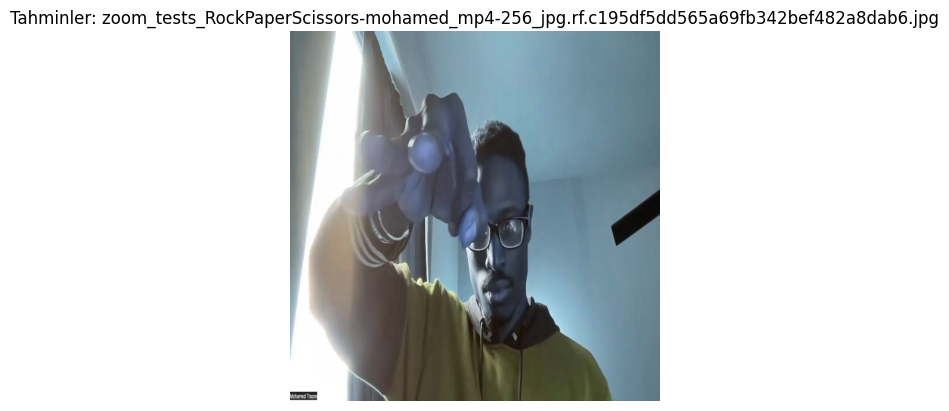


image 1/1 /content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/Rock-Paper-Scissors-SXSW-14/test/images/Screen-Recording-2023-03-11-at-9_48_18-PM_mov-118_jpg.rf.9f270623fc82abbad06d6dfb83f212c0.jpg: 640x640 (no detections), 437.6ms
Speed: 11.0ms preprocess, 437.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


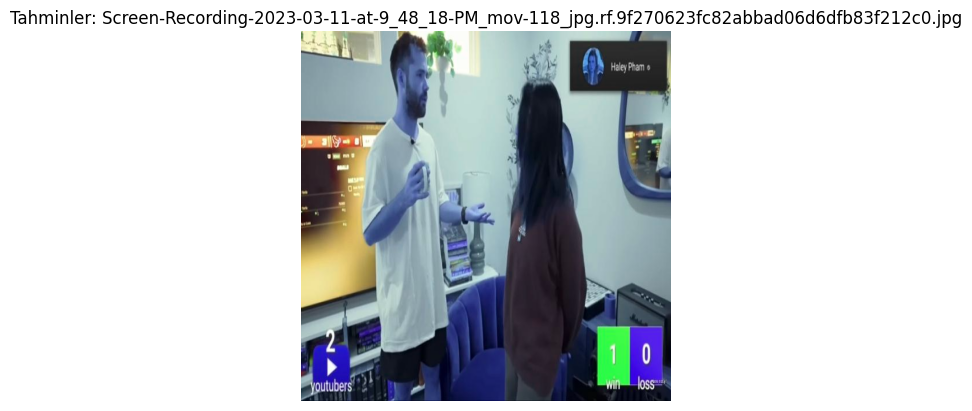


image 1/1 /content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/Rock-Paper-Scissors-SXSW-14/test/images/egohands-public-1625012671555_png_jpg.rf.0a99704085308772b0d8ddbcdf87e8e0.jpg: 640x640 (no detections), 967.5ms
Speed: 3.9ms preprocess, 967.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


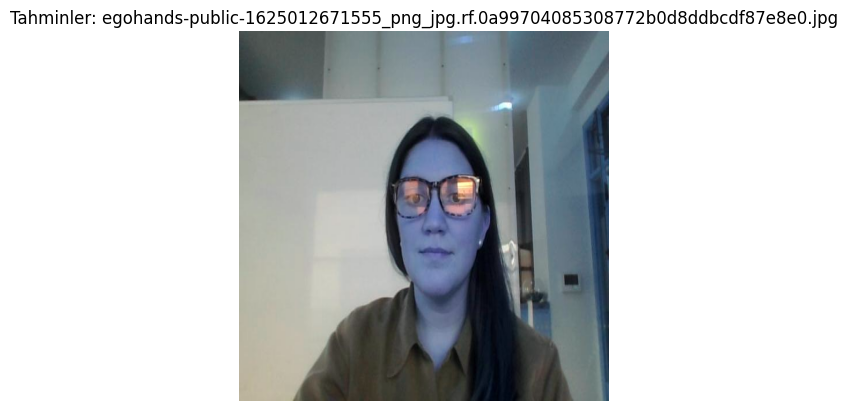


image 1/1 /content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/Rock-Paper-Scissors-SXSW-14/test/images/Screen-Shot-2022-02-08-at-12-58-44-PM_png.rf.aacd18a7433e7abe941150429310232d.jpg: 640x640 (no detections), 264.9ms
Speed: 3.3ms preprocess, 264.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


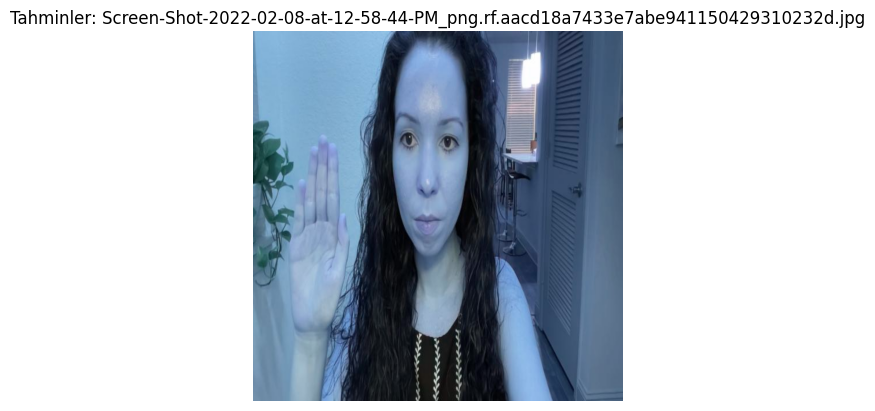


image 1/1 /content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/Rock-Paper-Scissors-SXSW-14/test/images/10e0gvm_jpg.rf.3b68a834fab647f30a57fc3ea92d4cd2.jpg: 640x640 (no detections), 299.1ms
Speed: 6.2ms preprocess, 299.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


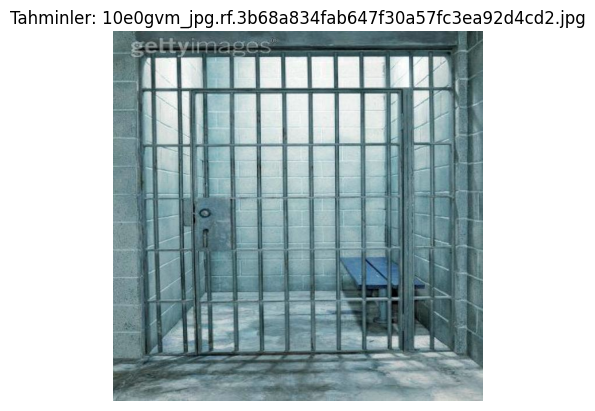


image 1/1 /content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/Rock-Paper-Scissors-SXSW-14/test/images/IMG_7043_MOV-66_jpg.rf.df85eb36076d3c01f38c67d2e791dcaa.jpg: 640x640 (no detections), 287.9ms
Speed: 3.5ms preprocess, 287.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


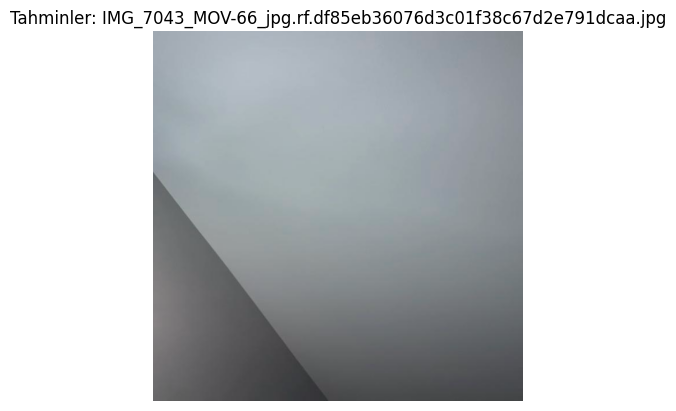


image 1/1 /content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/Rock-Paper-Scissors-SXSW-14/test/images/CHESS_COURTYARD_B_T_frame_1110_jpg.rf.7ea7ef51dbcf36a70d5df4d38f81a8c4.jpg: 640x640 (no detections), 278.4ms
Speed: 3.6ms preprocess, 278.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


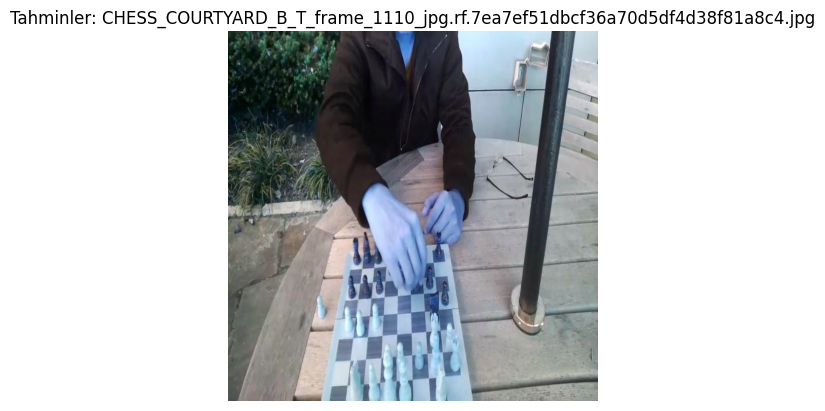


image 1/1 /content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/Rock-Paper-Scissors-SXSW-14/test/images/Screen-Recording-2023-03-11-at-9_48_18-PM_mov-249_jpg.rf.169375553540c1fd5d4ab4f2be00ef10.jpg: 640x640 (no detections), 308.8ms
Speed: 4.1ms preprocess, 308.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


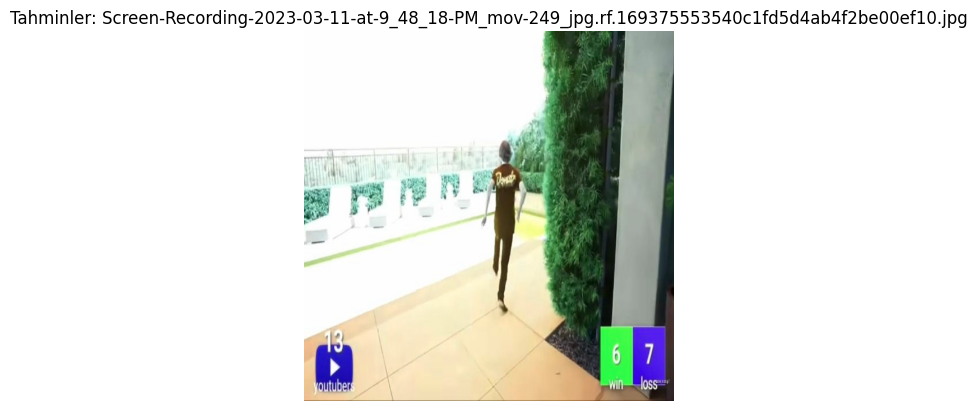


image 1/1 /content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/Rock-Paper-Scissors-SXSW-14/test/images/egohands-public-1625254249011_png_jpg.rf.a769a196160400a15fa323398ecc9af1.jpg: 640x640 (no detections), 312.7ms
Speed: 4.1ms preprocess, 312.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


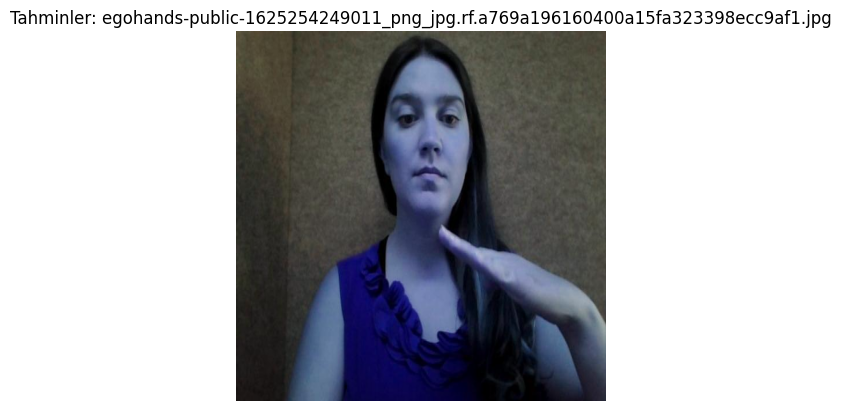


image 1/1 /content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/Rock-Paper-Scissors-SXSW-14/test/images/IMG_7079_MOV-55_jpg.rf.6cc0b375cd6b10947909d8fcd139c20f.jpg: 640x640 (no detections), 319.3ms
Speed: 3.7ms preprocess, 319.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


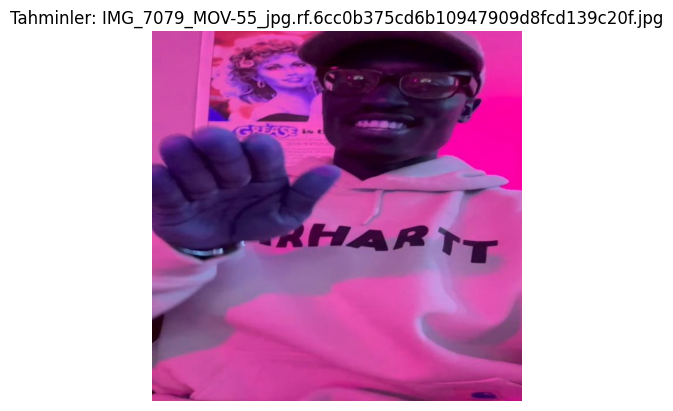

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# Test verileri yolunu belirtin
test_image_dir = '/content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/Rock-Paper-Scissors-SXSW-14/test/images'

# Test verileri üzerindeki tahminleri yapın ve görselleştirin
test_images = os.listdir(test_image_dir)[:10]  # İlk 10 test görüntüsünü seçin

for img_file in test_images:
    img_path = os.path.join(test_image_dir, img_file)
    results = model.predict(source=img_path, save=False, conf=0.25)  # Tahmin yapın

    # Görüntüyü ve tahmin sonuçlarını göster
    img = cv2.imread(img_path)
    plt.imshow(img)
    plt.title(f'Tahminler: {img_file}')
    plt.axis('off')
    plt.show()


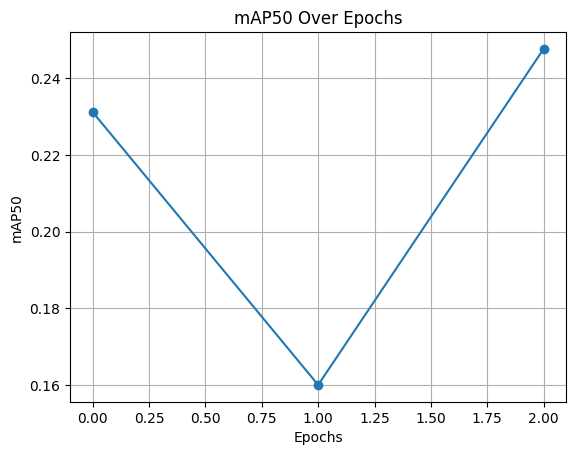

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# results.csv dosyasının yolunu belirtin
results_csv_path = '/content/drive/MyDrive/Colab Notebooks/YoloV10_RPS/runs/train/results.csv'

# results.csv dosyasını oku
results_df = pd.read_csv(results_csv_path)

# Sütun adlarındaki boşlukları temizle
results_df.columns = results_df.columns.str.strip()

# mAP50 değerlerini çıkar
map50_values = results_df['metrics/mAP50(B)']

# mAP50 Grafiğini Çizme
plt.plot(map50_values, marker='o')
plt.title('mAP50 Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('mAP50')
plt.grid(True)
plt.show()
